Dredging Tutorial 1

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

,Hs [m]
time,
2012-01-01 00:00:00,1.49262272910131
2012-01-01 01:00:00,1.5640411142480894
2012-01-01 02:00:00,1.609562005568361
2012-01-01 03:00:00,1.636151963909651
2012-01-01 04:00:00,1.6389448705755278


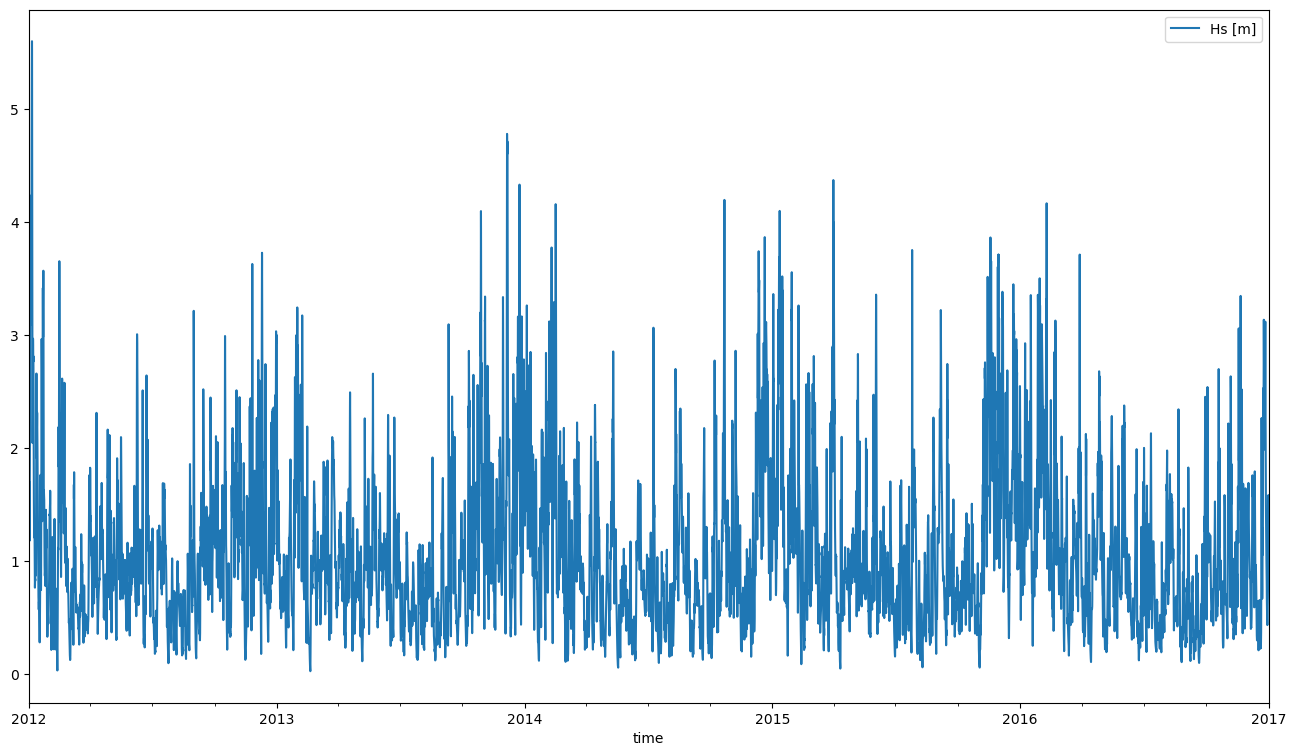

In [146]:
path = Path.cwd()
eurpfm = pd.read_csv(Path.joinpath(path, "Waves_Safe_Haven.csv"), delimiter = ',')
eurpfm['time'] = pd.to_datetime(eurpfm['time'], format='%Y-%m-%d %H:%M:%S')
eurpfm.set_index(['time'], inplace = True)

display(eurpfm.head(5))
eurpfm.plot(figsize=(16,9),subplots=True);

**1) Long Term Statistical Analysis**
\
Mean and Standard Deviation

In [147]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n", )

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

Mean
Hs [m]   1.061542415648853
dtype: float64 

Standard deviation
Hs [m]   0.687480264420601
dtype: float64


Monthly mean and Standard deviation

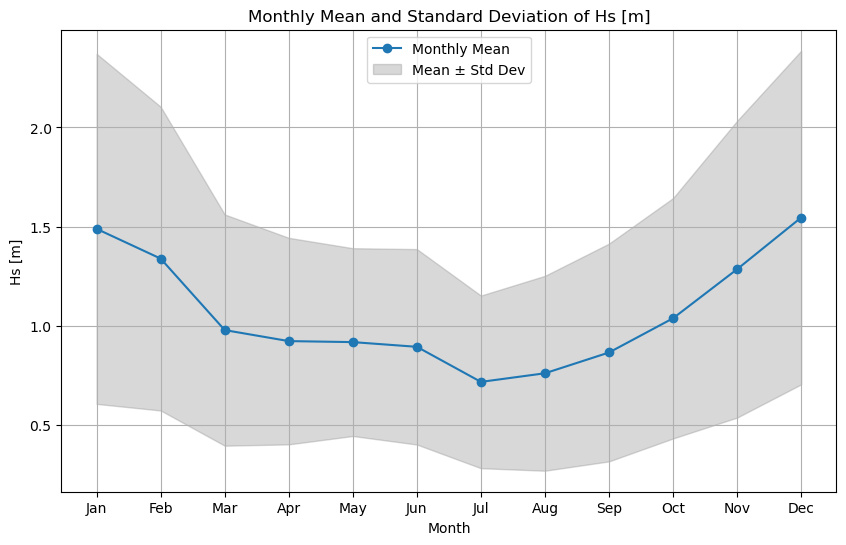

In [148]:
# Group by month (1-12) and calculate mean and std dev for each calendar month across all years
monthly_mean = eurpfm.groupby(eurpfm.index.month).mean()
monthly_std = eurpfm.groupby(eurpfm.index.month).std()

plt.figure(figsize=(10,6))
plt.plot(monthly_mean.index-1, monthly_mean['Hs [m]'], marker='o', label='Monthly Mean')
plt.fill_between(monthly_mean.index-1,
                 monthly_mean['Hs [m]'] - monthly_std['Hs [m]'],
                 monthly_mean['Hs [m]'] + monthly_std['Hs [m]'],
                 color='gray', alpha=0.3, label='Mean ± Std Dev')
plt.xticks(ticks=range(12), labels=months)
plt.xlabel('Month')
plt.ylabel('Hs [m]')
plt.title('Monthly Mean and Standard Deviation of Hs [m]')
plt.legend()
plt.grid(True)
plt.show()

**2)Long-Term assessment**
\
2.1 Workability

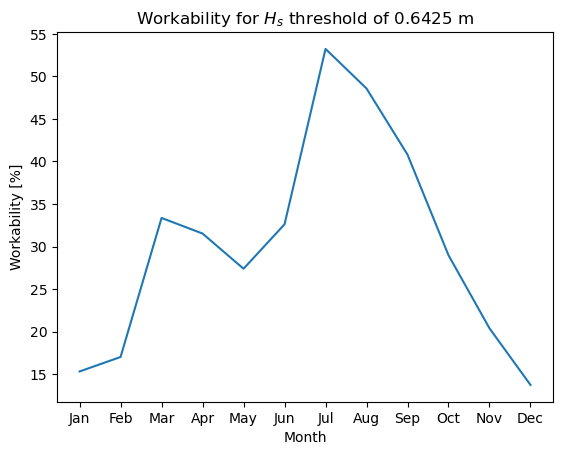

In [171]:
draught= 2.57  #CHANGE WITH BOATS
Hs_thres = 0.25 *draught  #CHANGE WITH BOAT DRAUGHT
work_ability = []

for month in range(1,12+1,1):
    data_month = eurpfm[eurpfm.index.month == month].copy()
    n_all = len(data_month)
    
    data_month = data_month[data_month['Hs [m]'] <= Hs_thres]
    n_workable = len(data_month)
    
    work_ability.append(n_workable/n_all*100)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(work_ability);
plt.title('Workability for $H_s$ threshold of ' + str(Hs_thres) + ' m');
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

Downtime

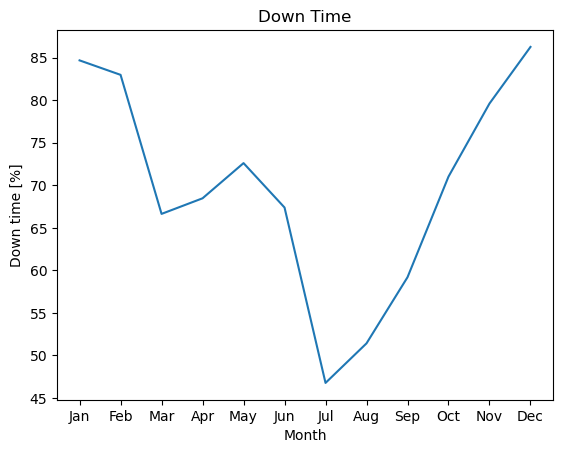

In [172]:
down_time = 100 - np.array(work_ability)

plt.plot(down_time)
plt.title('Down Time')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Down time [%]');

2.2) Presistency

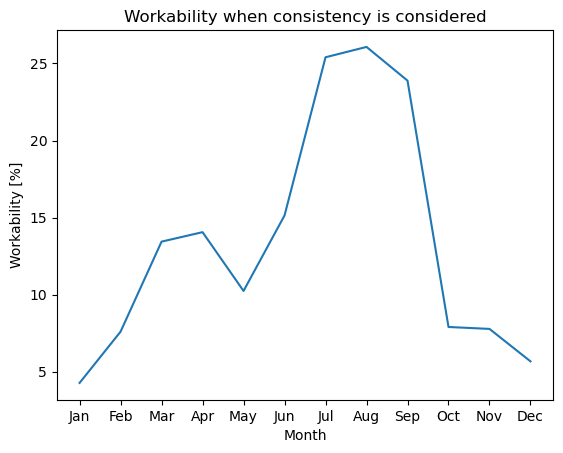

In [151]:
month_assessed = np.zeros(12)# an array that counts how many times each month is reviewed.
month_succes = np.zeros(12)# an array that will count the number of time 6 consequetive hours are occuring


for i in range(len(eurpfm)):
    period = eurpfm.iloc[i:i+6]
    
    month = period.index[0].month
    month_assessed[month-1] += 1# to zero-based

    Hs_serie = period['Hs [m]'].values.tolist()
 
    if np.max(Hs_serie) <= Hs_thres:    
        month_succes[month-1] += 1  # to zero-based
        #print(i, 'succes, Hs', np.max(Hs_serie))
    #else:
    #    print(i, 'not succes, Hs', np.max(Hs_serie), 'Wl min', np.min(WL_serie))

workability = month_succes/month_assessed*100

plt.plot(workability)
plt.title('Workability when consistency is considered')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

3) Work method strategy

|Site| Clay [m3] | Sand [m3]| Cemented Sand [m3] |
|----|-----------|----------|--------------------|
|Basin |300000 |450000 | 225000|    
|Channel | 0|248736/yr | 0|       

Maintenance Channel

In [152]:
wk = np.arange(1,53,1)
d= 8 # current and minimum navigational depth
maint_area = 220*1000 # area m2
S_acc = 250+260*d**1.4 * wk #[kg/yr/m]
# print(S_acc)

Basin Deepening

In [153]:
Deepen_Area = 200*750
basin_Clay_vol = Deepen_Area * 2 # m3
basin_Cemented_Sand_vol = Deepen_Area * 1.5 # m3
basin_Sand_vol = Deepen_Area * 3 # m3
print('Clay volume [m3]:', basin_Clay_vol)
print('Cemented Sand volume [m3]:', basin_Cemented_Sand_vol)
print('Sand volume [m3]:', basin_Sand_vol)

Clay volume [m3]: 300000
Cemented Sand volume [m3]: 225000.0
Sand volume [m3]: 450000


4) Spillage of fines during production
\
A maximum turbidity level of 10 mg/l

sand or arenitic grain size (0.0625 – 2 mm) and the corresponding sandstone;
– silt or siltitic grain size (0.004 – 0.0625 mm) and the corresponding siltstone;
– clay or lutitic grain size (<0.004 mm), whose lithified counterpart is claystone.

|Sediment | Size [um] |
|----|-----------|
|Sand |> 63 |
|Silt | 4-63|
| Clay |  < 4|   

4.2 Dry Density
\begin{align*}
\rho_d &= (1 - n)\rho_{sed} \\[1.5em]
\rho_{situ} &= \rho_d + n S_r \rho_w
\end{align*}

$S_r$ = saturation index

${\rho}_d$ = dry density

${\rho}_{sed}$ = sediment density

${\rho}_w$ = water density

$n$= porosity


In [154]:
# rho_situ_sand = 2000 # kg/m3
# rho_situ_clay = 1800 # kg/m3
# rho_situ_cemented_sand = 2400 # kg/m3
# rho_w = 1025 # kg/m3
# rho_s = 2650 # kg/m3

def calc_dry_dens(rho_situ, rho_s, rho_w, Srw):
    n = (rho_situ-rho_s)/(Srw*rho_w-rho_s)
    return (1-n)*rho_s

dry_dens_clay = calc_dry_dens(rho_situ = 1800, rho_s = 2650, rho_w = 1025, Srw = 1)
dry_dens_sand = calc_dry_dens(rho_situ = 2000, rho_s = 2650, rho_w = 1025, Srw = 1)
dry_dens_cemented_sand = calc_dry_dens(rho_situ = 2400, rho_s = 2650, rho_w = 1025, Srw = 1)

print('Dry density of clay, sand, cemented sand are:', round(dry_dens_clay,2),',', round(dry_dens_sand,2),'and', round(dry_dens_cemented_sand,2), 'kg/m3')

Dry density of clay, sand, cemented sand are: 1263.85 , 1590.0 and 2242.31 kg/m3


4.3) Spillage of fines without overflow 
\
4.3.1) BHD and barges (Barges for deepening clay disposal)


In [155]:
# clay = 100% fines
mb = 300000 * dry_dens_clay /1000
print ('mass of clay excavated from deepening:', round(mb,0), 'ton')

Sb = mb*0.07    #  fraction release ranges from 0-0.1 in table 1 becker 2015
print ('The total spillage at bottom door opening offshore:', round(Sb,0), 'ton')

#DONT NEED THIS CODE FOR DEEPENING WITH CLAY AS WE USE CSD
# print('Spill at the harbor settles at the harbor and has to be re-excavated')

# mh = mb # mass (to) hopper = mass bucket (mass hopper (mh) is mass retained (mr) for no overflow conditions)
# print('Total volume to dispose', mh, 'ton')

# S_dis1 = mh * 0.04
# print('Total offshore disposal spillage clay from BHD:', round(S_dis1,0), 'ton')

mass of clay excavated from deepening: 379154.0 ton
The total spillage at bottom door opening offshore: 26541.0 ton


4.3.2) TSHD
- no sand spillage in basin? f=1?
- What does 8% represent? sig2 = 8% during disposal during excavation of the sand
\
need to change for rainbowing!

In [156]:
def Spillage_basin(vol_situ, dry_dens,f, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
    mass = vol_situ * dry_dens/1000 *f # mass [ton] excavation
    s1 = mass * sig1 # spillage excavation
    mass2 = mass# mass [ton ]disposed, the same as mass 1 since spillage has to be re-excavated
    s2 = mass2 * sig2# spillage disposal
    return s1, s2, s1 + s2

def Spillage_channel(vol_situ, dry_dens,f, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
    mass = vol_situ * dry_dens/1000 *f # mass [ton] excavation
    s1 = mass * sig1 # spillage excavation
    mass2 = mass - s1 # mass [ton ]disposed
    s2 = mass2 * sig2# spillage disposal
    return s1, s2, s1 + s2

# s_TSHD1 = Spillage_basin(748000, 1263.85, 1,0.015, 0.08)
# print('Clay spillage: in basin', round(s_TSHD1[0],0), 'ton, at disposal site:', round(s_TSHD1[1],0), 'ton')

s_TSHD2 = Spillage_channel(248736, 1590, 0,0.02, 0.08)  #Assume a spillage of 2% near the draghead and 8% {WHAT is this 8%? need to change for rainbowing} during disposal during excavation of the sand
print('Sand spillage TSHD in channel:', round(s_TSHD2[0],0), 'and sand rainbowed for beach reclamation:', round(s_TSHD2[1],0), 'ton')
# print('Sand spillage TSHD: in channel', round(s_TSHD2[0],0), 'ton, at disposal site:', round(s_TSHD2[1],0), 'ton')

Sand spillage TSHD in channel: 0.0 and sand rainbowed for beach reclamation: 0.0 ton


4.3.3) Spill by CSD for sand
\
will use CSD on sand in deepening. disposal with barges in harbor

**WHAT f represents only a sandy layer in the deepening. report made it seem like 100% sand and thus f=0**
- sig 2 for clay/sand dumped with barges =0.07 (hydraulic bottom door) Becker 2015

In [157]:
#f=%mass that is fines  
#sig1= during excavation the % of fines entrained from cutter (Becker 2015)
#sig2 = % of fines released during disposal (from becker 2015)

s_CSD_Sand1 = Spillage_basin(basin_Sand_vol, dry_dens_sand, f=0, sig1 = 0.04, sig2 = 0.07)  
s_CSD_Clay1 = Spillage_basin(basin_Clay_vol, dry_dens_clay, f=1, sig1 = 0.04, sig2 = 0.07) 

print('CSD Sand spillage in basin:', s_CSD_Sand1[0], 'ton, to land reclamation:', s_CSD_Sand1[1], 'ton')
print('CSD Clay spillage in basin:', f'{s_CSD_Clay1[0]:.2f}', 'ton, offshore site:', f'{s_CSD_Clay1[1]:.2f}', 'ton')

CSD Sand spillage in basin: 0.0 ton, to land reclamation: 0.0 ton
CSD Clay spillage in basin: 15166.15 ton, offshore site: 26540.77 ton


4.3.4) Spill by CSD for cemented sand
- what is our f0? 0?
- The pipeline transport generates 1% of fines for every 250m of pumping distance. which yields f1. assumption from training session 2.. stick with it?
- CALCULATION CURRENTLY IF WE PUMP CEMENTED SAND OFFSHORE. considering barges to land reclam.

In [158]:
pipeline_length = 10000 #m
f0 = 0.05   # initial fraction of fines
f1 = f0 + 0.01 * pipeline_length/250# fraction fines at dumping site

def Spillage_basin_2(vol_situ, dry_dens,f0,f1, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
    mass = basin_Cemented_Sand_vol * dry_dens_cemented_sand/1000 *f0 # mass [ton] excavation
    s1 = mass * sig1 # spillage excavation
    mass2 = basin_Cemented_Sand_vol * dry_dens_cemented_sand/1000 *f1# more fine mass due to disintegration
    s2 = mass2 * sig2# spillage disposal
    return s1, s2, s1 + s2

print('The fraction fines at the land reclamation site:', f1)

c_CSD_CemSand1 = Spillage_basin_2(basin_Cemented_Sand_vol, dry_dens_cemented_sand, f0=f0, f1 = f1, sig1 = 0.04, sig2 = 0.05)

print('Cem. sand spillage in basin:', round(c_CSD_CemSand1[0],0), 'at land reclamation site:', round(c_CSD_CemSand1[1],0), 'ton')


The fraction fines at the land reclamation site: 0.45
Cem. sand spillage in basin: 1009.0 at land reclamation site: 11352.0 ton


4.3.5) Overview of total and weekly spillage

In [159]:
# answer starts here, dont delete cell above

# project = pd.DataFrame()
# project['Soil'] = ['clay', 'clay', 'clay', 'sand', 'sand', 'cemented sand', 'cemented sand']
# project['site'] = ['basin', 'basin', 'channel', 'basin', 'channel', 'basin', 'channel']
# project['Equipment'] = ['BHD', 'TSHD', 'TSHD', 'CSD', 'CSD', 'CSD', 'CSD']
# project['in-situ vol [m3]'] = [150000, 748000, 1378000, 3900000, 290000,1452000, 232000]
# project['production [m3/week]'] =[42000, 127000, 127000, 252000, 252000,150000, 150000]
# project['fines [ton]'] =[Sb + S_dis1, s_TSHD1[2],s_TSHD2[2], s_CSD_Sand1[2], s_CSD_Sand2[2], c_CSD_CemSand1[2], c_CSD_CemSand2[2]]# spillage in harbour is included
# project['fines (excl harbour) [ton]'] = [S_dis1, s_TSHD1[1],s_TSHD2[2], s_CSD_Sand1[1], s_CSD_Sand2[2], c_CSD_CemSand1[1], c_CSD_CemSand2[2]]# spillage in harbour is included

# project_rounded = project.round({'fines [ton]': 0, 'fines (excl harbour) [ton]':0})# for visualization purposes
# display(project_rounded)

Total Spillage with and without harbor

In [160]:
# Total_spill_including_harbor = project['fines [ton]'].sum()
# Total_spill_excluding_harbor = project['fines (excl harbour) [ton]'].sum()
# print('The total spillage, including at the harbor:', round(Total_spill_including_harbor,0), 'ton')

# print('The total spillage, excluding at the harbor:', round(Total_spill_excluding_harbor,0), 'ton')
# print('Spills inside the harbour/basin does not enter the environment, so it should not be an environmental problem. \nIt can be assumed to enter the environment to be on the safe side.')

# print('\nThe spillage does not exceed the limit of 675000 tons, in both cases.')

Optional code in training session for spills per week

4.4.1) Fines released from dredging without overflow

4.4.2) Fine sediment concentrations near reef without overflow

**5) Energy consumption and emissions**
\
required energy and the release of a emmissions on a very basic level for dredging and disposing clay with one or multiple TSHD's.

5.1.2) Hydraulic power for dredging

In [161]:
def calc_P(Q,H,rho_m,eta):
    return Q*H*rho_m*9.81/eta

# # 3600 m3/h = 1m3/s
# P_dredge = calc_P(Q = 1,H = 10, rho_m = 1400,eta = 0.8)
# print('The required hydraulic power for dredging', round(P_dredge,0), 'W')

5.1.3) Required energy for dredging

In [162]:
# min = 60  #CHANGE AMOUNT OF MINUTES FOR DREDGING
# t_dredge = minutes*60   #seconds
# E_dredge = t_dredge * P_dredge
# print('The required energy for dredging is', round(E_dredge,0),'J')

5.1.4) Required energy for propulsion system

In [163]:
# E_dredge_propulsion = 200000* min *60
# print('The thruster require:', E_dredge_propulsion, 'J')

5.2) Sailing
we assume that the resistance experienced by a ship is linearly related to the sailing speed (v), with a constant (C) which is estimated to be 450 SJ/m2 for sailing unloaded and 700 sJ/m2 when it is loaded, as in formula 5.2. The expression for the required power (P) to get a certain speed is described in formula 5.2b.

$R = Cv^2$
\
$P= Rv = Cv^3$

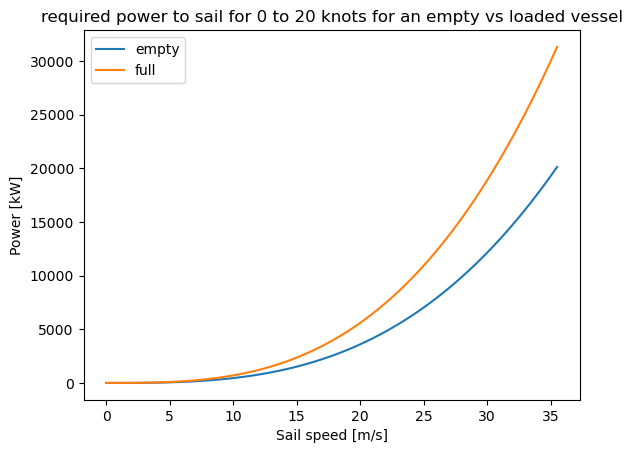

In [164]:
def calc_P_sail(v,c):
    return c * v**3

v_serie = np.arange(0,19*1.852+0.5,0.5) #1knot = 1.852km/h

P_empty =[]
P_full = []
for v in v_serie:
    P_empty.append(calc_P_sail(v,450)/1000)
    P_full.append(calc_P_sail(v,700)/1000)

plt.plot(v_serie,P_empty, label = 'empty')
plt.plot(v_serie,P_full, label = 'full')
plt.title('required power to sail for 0 to 20 knots for an empty vs loaded vessel')
plt.legend();
plt.ylabel('Power [kW]')
plt.xlabel('Sail speed [m/s]');


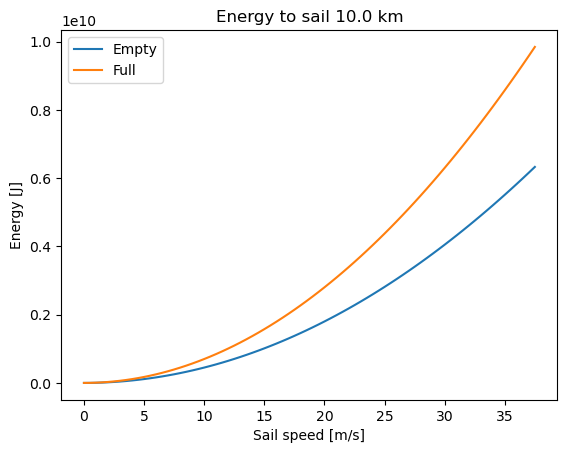

In [165]:
def calc_E_sail(s, v, c_sail):
    P_sail = c_sail*v**3
    t = s/v
    return P_sail * t

v_serie = np.arange(0.001,20*1.852+0.5,0.5)

E_empty =[]
E_full = []

s = 10000 #TO SAIL 10km

for v in v_serie:
    E_empty.append(calc_E_sail(s, v=v, c_sail=450))    
    E_full.append( calc_E_sail(s, v=v, c_sail=700))
    
plt.plot(v_serie, E_empty, label = 'Empty')
plt.plot(v_serie, E_full, label = 'Full')
plt.title(f'Energy to sail {s/1000} km')
plt.legend()
plt.xlabel('Sail speed [m/s]')
plt.ylabel('Energy [J]');

5.4) Maneuvers

In [166]:
# v = knots * 1.852 km/hr
# c = constant. if empty c=450 SJ/m2, if full c=700 SJ/m2
t = 5*60 # 5 min * 60 sec

E_maneuvre_empty = calc_P_sail(v=8*1.852,c=450) * (t) # P_sail(8 knots) * t
E_maneuvre_full = calc_P_sail(v=4*1.852,c=700) * (t)
print('Energy use while Empty:', round( E_maneuvre_empty,0) , 'W')
print('Energy use while Full:',  round( E_maneuvre_full, 0) , 'W')

Energy use while Empty: 439062834.0 W
Energy use while Full: 85373329.0 W


5.5) Energy consumption of total project

5.5.1) One vessel at high sailing speed

5.5.2) Multiple vessels

5.6) Release of emissions